# Unsupervised Machine Learning: Clustering Task 6.5 

## This script contains the following: 

### 1. Importing libraries and data

### 2. Data cleaning, manipulations, reprocessing, and scaling data

### 3. Using elbow technique and interpretation 

### 4. Running the k-means algorithm

### 5. Creating cluster column and scatterplots and discussion of results

### 6. Calculating the descriptive statistics and discussion

### 7. Extra - Trying to visualize clusters on a map

## 1. Importing Libraries 

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import folium
import os
import random
random.seed(110)
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 
import warnings
warnings.filterwarnings("ignore")

## 1. Importing Data 

In [42]:
## Importing data
df_terror = pd.read_csv(r"C:\Users\bgros\Documents\Career Foundry\10-2023 Global Terrorism Analysis\02. Data\Clean Data\Clean_Terror_Data.csv", encoding = "ISO-8859-1", low_memory=True)

In [43]:
## Checking data types 
df_terror.dtypes

iyear                   int64
imonth                  int64
iday                    int64
extended                int64
country_txt            object
region_txt             object
latitude              float64
longitude             float64
crit1                  object
crit2                   int64
crit3                   int64
doubtterr             float64
multiple              float64
success                 int64
suicide                 int64
attacktype1_txt        object
targtype1_txt          object
targsubtype1_txt       object
natlty1_txt            object
gname                  object
motive                 object
guncertain1           float64
individual              int64
nperps                float64
nperpcap              float64
claimed                 int64
weaptype1_txt          object
weapsubtype1_txt       object
nkill                 float64
nkillus               float64
nkillter              float64
nwound                float64
nwoundus              float64
nwoundte  

In [44]:
## Checking missing values 
df_terror.isnull().sum()

iyear                     0
imonth                    0
iday                      0
extended                  0
country_txt               0
region_txt                0
latitude                807
longitude               807
crit1                     0
crit2                     0
crit3                     0
doubtterr                 1
multiple                  1
success                   0
suicide                   0
attacktype1_txt           0
targtype1_txt             0
targsubtype1_txt          0
natlty1_txt               0
gname                     0
motive                    0
guncertain1             338
individual                0
nperps                10986
nperpcap               2747
claimed                   0
weaptype1_txt             0
weapsubtype1_txt          0
nkill                  3873
nkillus                 340
nkillter               2430
nwound                 7422
nwoundus                539
nwoundte               4101
property                  0
propextent_txt      

## 2. Question 2: Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming). 

Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data. 

Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [45]:
## Creating subgroups to remove most categorical variables 
## nhostkid, nhostkidus, and nreleased were removed because they have over 97,000 missing values (91% of the entire dataset)
## nperps has over 87,000 missing values after replacing -99 with NaN (82% of the entire dataset)
sub = df_terror[['country_txt','region_txt','iyear', 'imonth', 'iday', 'attacktype1_txt', 'nperpcap', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte']]

In [46]:
## Creating column to only list major regions, not sub regions 

sub['region_edited'] = sub['region_txt'].copy()

sub['region_edited'] = sub['region_edited'].str.replace('Sub-Saharan Africa','Africa')
sub['region_edited'] = sub['region_edited'].str.replace('South Asia','Asia')
sub['region_edited'] = sub['region_edited'].str.replace('East Asia','Asia')
sub['region_edited'] = sub['region_edited'].str.replace('Southeast Asia','Asia')
sub['region_edited'] = sub['region_edited'].str.replace('Central Asia','Asia')

sub['region_edited'] = sub['region_edited'].str.replace('Eastern Europe','Europe')
sub['region_edited'] = sub['region_edited'].str.replace('Western Europe','Europe')

sub['region_edited'] = sub['region_edited'].str.replace('Central America & Caribbean','South America')

sub['region_edited'].unique()

array(['Africa', 'Asia', 'Europe', 'Middle East & North Africa',
       'North America', 'South America', 'Australasia & Oceania'],
      dtype=object)

In [47]:
## Checking missing values 
sub.isnull().sum()

country_txt           0
region_txt            0
iyear                 0
imonth                0
iday                  0
attacktype1_txt       0
nperpcap           2747
nkill              3873
nkillus             340
nkillter           2430
nwound             7422
nwoundus            539
nwoundte           4101
region_edited         0
dtype: int64

In [48]:
## Converting -99 to missing values 
sub2 = sub.replace(to_replace=-99, value=np.nan)
sub2 = sub2.replace(to_replace=-9, value=np.nan)
sub2[sub2 ==-99].sum()
sub2[sub2 ==-9].sum()

country_txt          0
region_txt           0
iyear              0.0
imonth             0.0
iday               0.0
attacktype1_txt      0
nperpcap           0.0
nkill              0.0
nkillus            0.0
nkillter           0.0
nwound             0.0
nwoundus           0.0
nwoundte           0.0
region_edited        0
dtype: object

In [49]:
## Checking missing values 
sub2.isnull().sum()

country_txt           0
region_txt            0
iyear                 0
imonth                0
iday                  0
attacktype1_txt       0
nperpcap           3585
nkill              3873
nkillus             340
nkillter           2430
nwound             7422
nwoundus            539
nwoundte           4101
region_edited         0
dtype: int64

In [50]:
## Dropping Missing Values 
sub2 = sub2.dropna()
sub2 = sub2.reset_index(drop=True)
sub2

,country_txt,region_txt,iyear,imonth,iday,attacktype1_txt,nperpcap,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,region_edited
0,Kosovo,Eastern Europe,2000,1,1,Bombing/Explosion,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Europe
1,Somalia,Sub-Saharan Africa,2000,1,1,Armed Assault,0.0,6.0,0.0,0.0,10.0,0.0,0.0,Africa
2,India,South Asia,2000,1,1,Bombing/Explosion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Asia
3,Kosovo,Eastern Europe,2000,1,1,Armed Assault,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe
4,Turkey,Middle East & North Africa,2000,1,1,Bombing/Explosion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle East & North Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93720,Somalia,Sub-Saharan Africa,2017,12,31,Armed Assault,0.0,1.0,0.0,0.0,2.0,0.0,0.0,Africa
93721,Syria,Middle East & North Africa,2017,12,31,Bombing/Explosion,0.0,2.0,0.0,0.0,7.0,0.0,0.0,Middle East & North Africa
93722,Philippines,Southeast Asia,2017,12,31,Facility/Infrastructure Attack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Asia
93723,India,South Asia,2017,12,31,Bombing/Explosion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Asia


In [51]:
## Checking min values 
sub2.agg('min')

country_txt                  Afghanistan
region_txt         Australasia & Oceania
iyear                               2000
imonth                                 1
iday                                   0
attacktype1_txt            Armed Assault
nperpcap                             0.0
nkill                                0.0
nkillus                              0.0
nkillter                             0.0
nwound                               0.0
nwoundus                             0.0
nwoundte                             0.0
region_edited                     Africa
dtype: object

In [52]:
## Checking max values 
sub2.agg('max')

country_txt              Zimbabwe
region_txt         Western Europe
iyear                        2017
imonth                         12
iday                           31
attacktype1_txt           Unknown
nperpcap                    406.0
nkill                       670.0
nkillus                      44.0
nkillter                    500.0
nwound                     1500.0
nwoundus                    151.0
nwoundte                    200.0
region_edited       South America
dtype: object

In [1]:
## Info on sub2
sub2.info()

NameError: name 'sub2' is not defined

In [54]:
## Scaling numerical variables and removing categorical variables
scaler = StandardScaler()
scaled_features = scaler.fit_transform(sub2.select_dtypes(include=np.number))
scaled_features

array([[-3.10033109, -1.6234212 , -1.66159709, ..., -0.17893963,
        -0.02174899, -0.07444352],
       [-3.10033109, -1.6234212 , -1.66159709, ...,  0.48910816,
        -0.02174899, -0.07444352],
       [-3.10033109, -1.6234212 , -1.66159709, ..., -0.25316717,
        -0.02174899, -0.07444352],
       ...,
       [ 1.16669616,  1.6257502 ,  1.74170775, ..., -0.25316717,
        -0.02174899, -0.07444352],
       [ 1.16669616,  1.6257502 ,  1.74170775, ..., -0.25316717,
        -0.02174899, -0.07444352],
       [ 1.16669616,  1.6257502 ,  1.74170775, ..., -0.25316717,
        -0.02174899, -0.07444352]])

## 3. Question 3 - Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [55]:
## Defining range of potential clusters 
num_c1 = range(1, 10)

In [56]:
## Defines k-means clusters in the assigned range 
kmeans = [KMeans(n_clusters = i) for i in num_c1]

In [57]:
## Creates a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(scaled_features).score(scaled_features)for i in range (len(kmeans))]

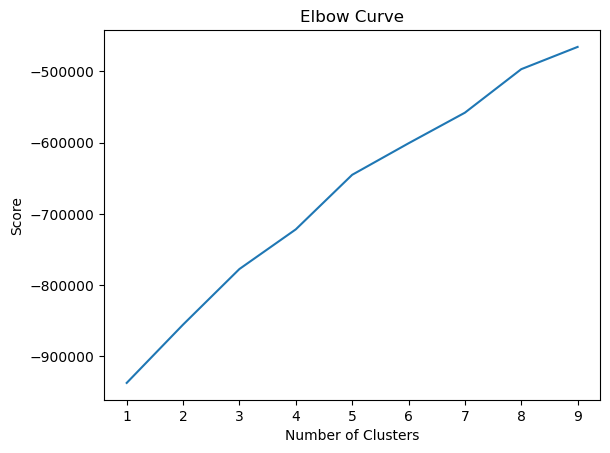

In [58]:
## Plot the elbow curve using PyLab. 
pl.plot(num_c1, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 3. Question 4 - Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.

Explain why you chose that number in a markdown cell.

If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

### Answer 4: 
I will use 4 clusters because between 4 is where the curve jumps the most. 

## 4. Question 5 - Run the k-means algorithm.

In [59]:
## Create the k-means object 
kmeans = KMeans(n_clusters = 4) 

In [60]:
## Fit the k-means ojbect to the data
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

## 5. Question 6 - Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [61]:
## Create a column for clusters 
sub2['clusters'] = kmeans.fit_predict(scaled_features)

In [62]:
## Consistency Checks 
sub2.head()

,country_txt,region_txt,iyear,imonth,iday,attacktype1_txt,nperpcap,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,region_edited,clusters
0,Kosovo,Eastern Europe,2000,1,1,Bombing/Explosion,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Europe,0
1,Somalia,Sub-Saharan Africa,2000,1,1,Armed Assault,0.0,6.0,0.0,0.0,10.0,0.0,0.0,Africa,0
2,India,South Asia,2000,1,1,Bombing/Explosion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Asia,0
3,Kosovo,Eastern Europe,2000,1,1,Armed Assault,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,0
4,Turkey,Middle East & North Africa,2000,1,1,Bombing/Explosion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle East & North Africa,0


In [63]:
## Value Counts of clusters 
sub2['clusters'].value_counts()

1    39098
3    37995
0    16625
2        7
Name: clusters, dtype: int64

In [64]:
## Value counts of regions 
sub2[['region_edited', 'clusters']].value_counts()

region_edited               clusters
Asia                        1           17442
                            3           17264
Middle East & North Africa  1           14543
                            3           13652
Asia                        0            7143
Middle East & North Africa  0            5493
Africa                      1            4085
                            3            4034
Europe                      1            2127
                            3            2092
                            0            1890
Africa                      0            1079
South America               0             825
                            3             734
                            1             703
North America               3             197
                            1             176
                            0             175
Australasia & Oceania       3              22
                            1              22
                            0              

## 5. Question 7 - Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

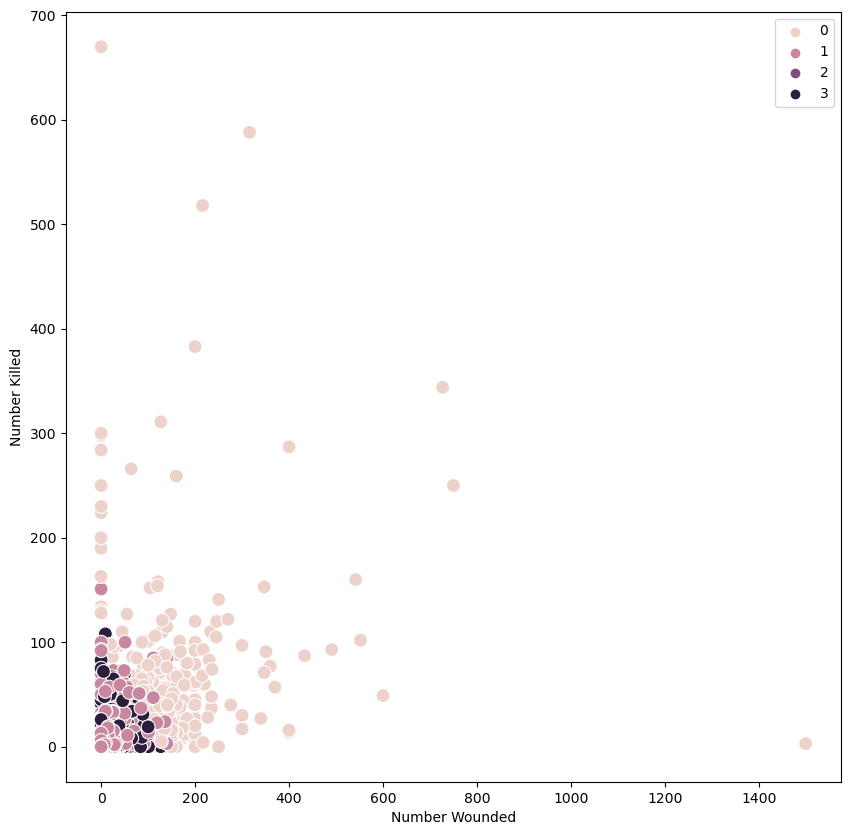

In [65]:
## Create visualizations with nwound and nkill

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=sub2['nwound'], y=sub2['nkill'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number Wounded')
plt.ylabel('Number Killed')
plt.show()

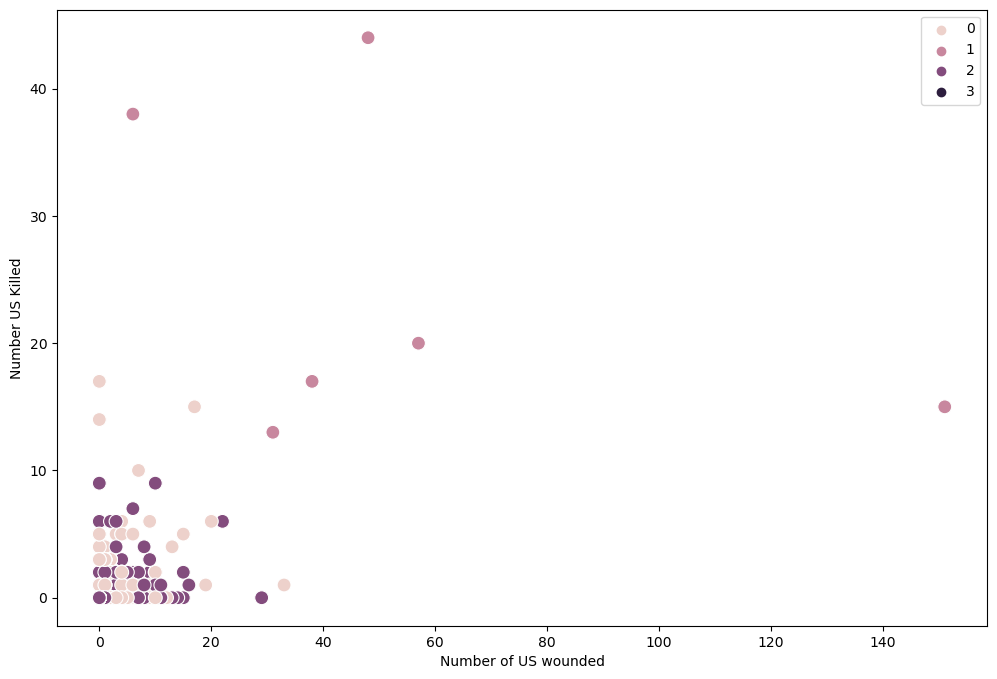

In [25]:
## Create visualizations with nwoundus and nkillus 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub2['nwoundus'], y=sub2['nkillus'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of US wounded')
plt.ylabel('Number US Killed')
plt.show()

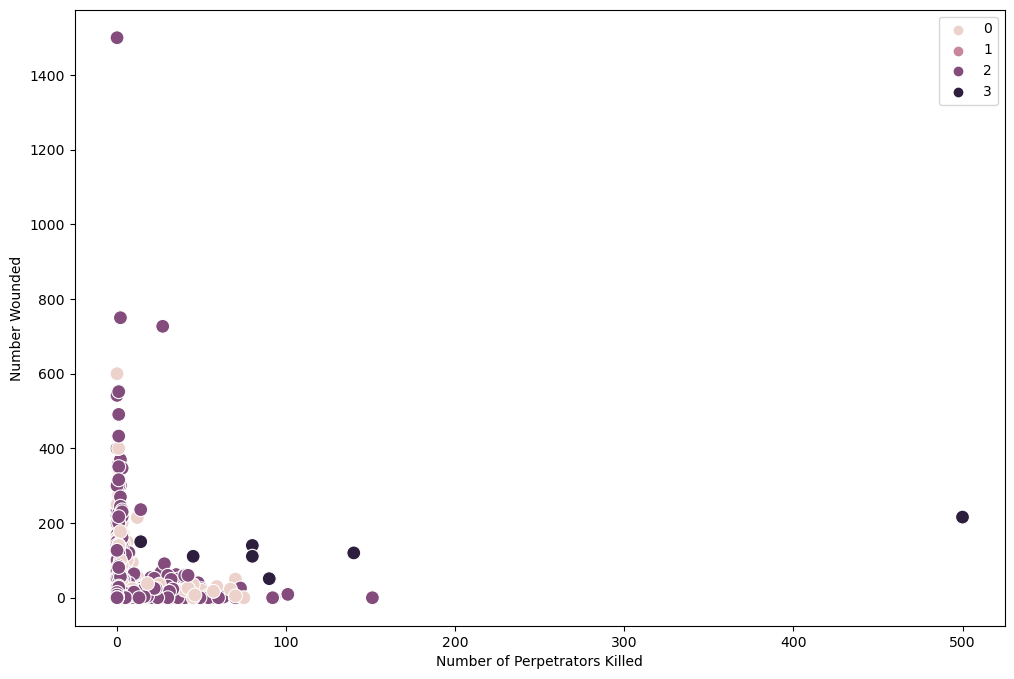

In [26]:
## Create visualizations with nkillter and nwound 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub2['nkillter'], y=sub2['nwound'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of Perpetrators Killed')
plt.ylabel('Number Wounded')
plt.show()

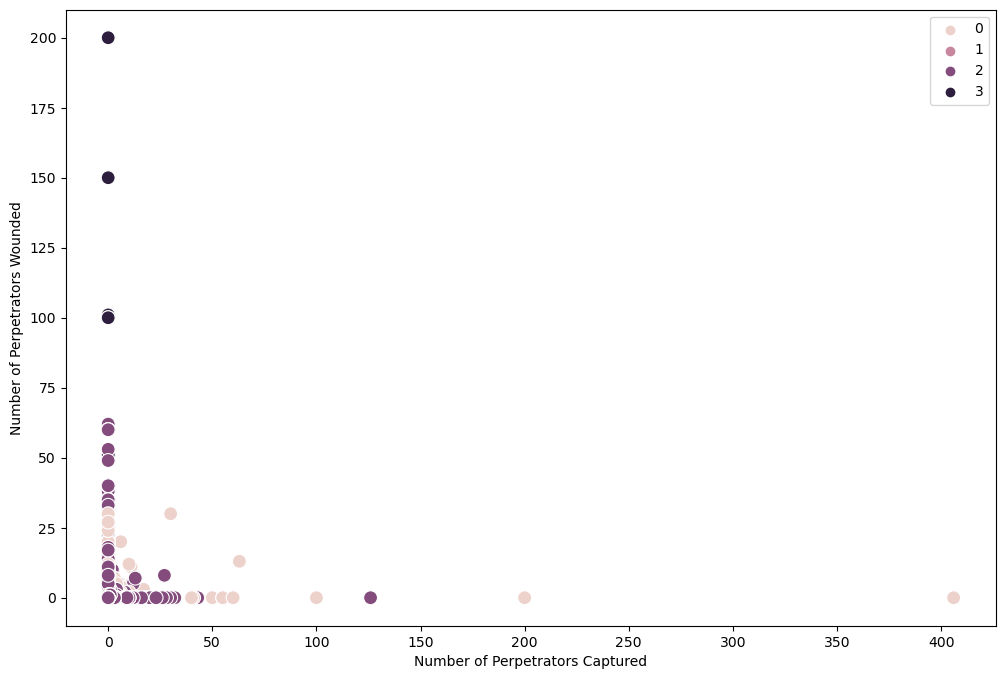

In [27]:
## Create visualizations with nperpcap and nwoundte 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub2['nperpcap'], y=sub2['nwoundte'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of Perpetrators Captured')
plt.ylabel('Number of Perpetrators Wounded')
plt.show()

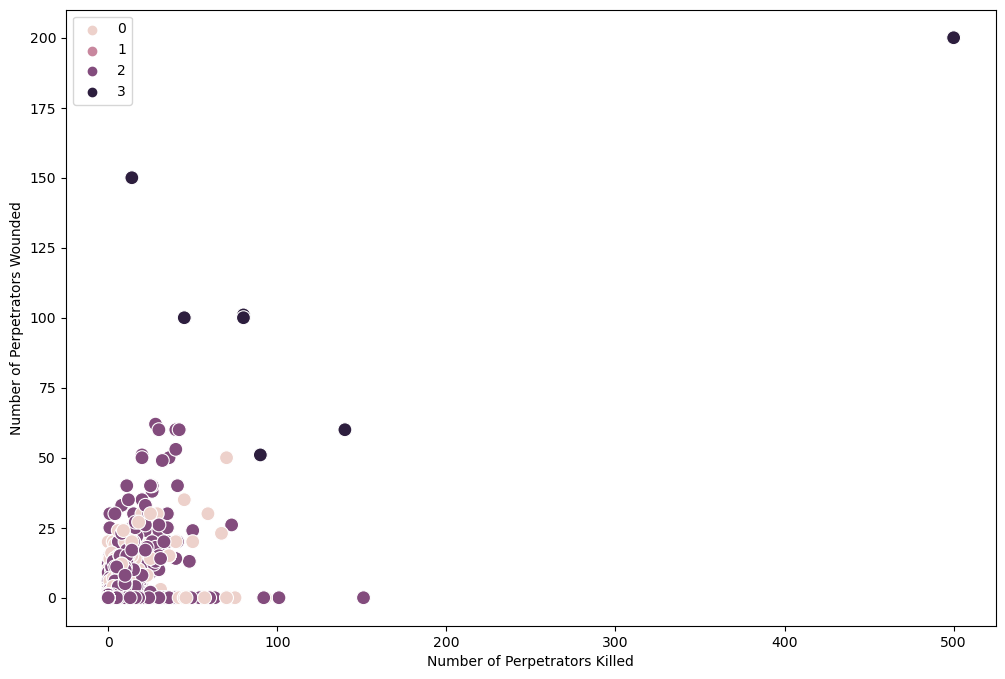

In [28]:
## Create visualizations with nkillter and nwoundte 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub2['nkillter'], y=sub2['nwoundte'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of Perpetrators Killed')
plt.ylabel('Number of Perpetrators Wounded')
plt.show()

## 5. Question 8 - Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
Note down your thoughts in a markdown cell.

### Answer: 
By value counting the regions, it is easy to see most clusters in 0 and 3 are in Asia, North Africa, Europe, Africa or the Middle East. They also have the least amount of perpetrators wounded, least amount of perpetrators killed, number wounded, and number killed. Cluster 1 is still in Asia, North Africa, and the Middle East, but much less. This group tends to have more perpetrators wounded, number wounded, and number killed. Cluster 2 is only in North America, Middle east and North Africa. Potentially the types of attacks could affect the clusters. 

## 6. Question 9 - Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [66]:
## Create clusters by name 
sub2['clusters_color'] = sub2['clusters'].copy()
sub2.loc[sub2['clusters_color'] ==0, 'clusters_color'] = 'pink'
sub2.loc[sub2['clusters_color'] ==1, 'clusters_color'] = 'light purple'
sub2.loc[sub2['clusters_color'] ==2, 'clusters_color'] = 'purple'
sub2.loc[sub2['clusters_color'] ==3, 'clusters_color'] = 'black'
sub2['clusters_color'].unique()

array(['pink', 'purple', 'light purple', 'black'], dtype=object)

In [67]:
## Aggregating my mean and median 
sub2.groupby('clusters').agg({'nperpcap': ['mean', 'median'],
                             'nkill': ['mean', 'median'],
                             'nkillus': ['mean', 'median'], 
                             'nkillter' : ['mean', 'median'],
                             'nwound' : ['mean', 'median'],
                             'nwoundus' : ['mean', 'median'], 
                             'nwoundte' : ['mean', 'median']})

nperpcap             nkill           nkillus         nkillter  \
              mean median       mean median       mean median      mean   
clusters                                                                  
0         0.255759    0.0   3.812872    1.0   0.016301    0.0  0.239278   
1         0.082690    0.0   1.699243    1.0   0.006880    0.0  0.408077   
2         0.142857    0.0  25.714286   19.0  23.142857   17.0  1.428571   
3         0.081721    0.0   1.579287    1.0   0.006975    0.0  0.357231   

                    nwound          nwoundus         nwoundte         
         median       mean median       mean median      mean median  
clusters                                                              
0           0.0   7.836090    0.0   0.029113    0.0  0.039278    0.0  
1           0.0   2.527342    0.0   0.006241    0.0  0.162745    0.0  
2           1.0  51.857143   38.0  49.714286   38.0  0.142857    0.0  
3           0.0   2.374391    0.0   0.006553    0.0  0.109962    0.0

In [68]:
## Just aggregating by mean 
sub2.groupby('clusters').agg({'nperpcap': ['mean'],
                             'nkill': ['mean'],
                             'nkillus': ['mean'], 
                             'nkillter' : ['mean'],
                             'nwound' : ['mean'],
                             'nwoundus' : ['mean'], 
                             'nwoundte' : ['mean']})

,nperpcap,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte
,mean,mean,mean,mean,mean,mean,mean
clusters,,,,,,,
0,0.255759,3.812872,0.016301,0.239278,7.836090,0.029113,0.039278
1,0.082690,1.699243,0.006880,0.408077,2.527342,0.006241,0.162745
2,0.142857,25.714286,23.142857,1.428571,51.857143,49.714286,0.142857
3,0.081721,1.579287,0.006975,0.357231,2.374391,0.006553,0.109962


### The mean for nperpcap, nkill, nkillter, nwound, and nwoundte for cluster 1 is higher than the rest. 

In [69]:
## Seeing what attacks took place in purple 
sub2[sub2['clusters_color'] == 'purple']

,country_txt,region_txt,iyear,imonth,iday,attacktype1_txt,nperpcap,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,region_edited,clusters,clusters_color
845,Yemen,Middle East & North Africa,2000,10,12,Bombing/Explosion,0.0,19.0,17.0,2.0,38.0,38.0,0.0,Middle East & North Africa,2,purple
2409,United States,North America,2001,9,11,Hijacking,0.0,44.0,38.0,4.0,6.0,6.0,0.0,North America,2,purple
5542,Iraq,Middle East & North Africa,2004,12,21,Bombing/Explosion,0.0,23.0,20.0,1.0,66.0,57.0,0.0,Middle East & North Africa,2,purple
18872,United States,North America,2009,11,5,Armed Assault,1.0,13.0,13.0,0.0,32.0,31.0,1.0,North America,2,purple
39127,United States,North America,2013,4,17,Facility/Infrastructure Attack,0.0,15.0,15.0,0.0,151.0,151.0,0.0,North America,2,purple
72593,United States,North America,2015,12,2,Bombing/Explosion,0.0,16.0,15.0,2.0,17.0,17.0,0.0,North America,2,purple
78706,United States,North America,2016,6,12,Hostage Taking (Barricade Incident),0.0,50.0,44.0,1.0,53.0,48.0,0.0,North America,2,purple


In [33]:
## Displaying max columns 
pd.set_option('display.max_columns', 100)

In [70]:
## Seeing what attacks took place in black 
sub2[sub2['clusters_color'] == 'black']

,country_txt,region_txt,iyear,imonth,iday,attacktype1_txt,nperpcap,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,region_edited,clusters,clusters_color
11000,Philippines,Southeast Asia,2008,1,1,Armed Assault,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Asia,3,black
11002,Sudan,Sub-Saharan Africa,2008,1,1,Armed Assault,0.0,2.0,1.0,0.0,0.0,0.0,0.0,Africa,3,black
11003,Sri Lanka,South Asia,2008,1,1,Armed Assault,1.0,2.0,0.0,0.0,10.0,0.0,1.0,Asia,3,black
11005,Iraq,Middle East & North Africa,2008,1,1,Armed Assault,0.0,1.0,0.0,0.0,9.0,0.0,0.0,Middle East & North Africa,3,black
11006,Iraq,Middle East & North Africa,2008,1,1,Assassination,0.0,5.0,0.0,0.0,0.0,0.0,0.0,Middle East & North Africa,3,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93424,India,South Asia,2017,12,15,Bombing/Explosion,0.0,1.0,0.0,1.0,3.0,0.0,0.0,Asia,3,black
93425,Egypt,Middle East & North Africa,2017,12,15,Bombing/Explosion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle East & North Africa,3,black
93426,Latvia,Eastern Europe,2017,12,15,Facility/Infrastructure Attack,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,3,black
93427,Indonesia,Southeast Asia,2017,12,15,Armed Assault,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Asia,3,black


## 6. Question 10 - Propose what these results could be useful for in future steps of an analytics pipeline.

### Answer: 
It would be interesting to research what other types of attacks are happening in cluster 2 and why they are similar to 9/11.  It would be interesting to see what makes cluster 0 and 3 similar. 

In [71]:
## Exporting to excel 
sub2.to_excel(r"C:\Users\bgros\Documents\Career Foundry\10-2023 Global Terrorism Analysis\02. Data\Clean Data\Clean_Terror_Data_with_clusters_V2.xlsx", index=False)

## 7. Extra - Trying to visualize clusters on a map, and it kinda works

In [36]:
## Import JSON file 
country_geo = r'C:/Users/bgros/Documents/Career Foundry/10-2023 Global Terrorism Analysis/02. Data/Clean Data/world-countries.json'

In [37]:
## Making sure text matches JSON file 
sub2['country_txt'].replace('United States', 'United States of America', inplace = True)
sub2['country_txt'].replace('Slovak Republic', 'Slovakia', inplace = True)
sub2['country_txt'].replace('Bosnia-Herzegovina', 'Bosnia and Herzegovina', inplace = True)
sub2['country_txt'].replace('West Bank and Gaza Strip', 'West Bank', inplace = True)
sub2['country_txt'].replace('Hong Kong', 'China', inplace = True)
sub2['country_txt'].replace('Guinea-Bissau', 'Guinea Bissau', inplace = True)
sub2['country_txt'].replace('Republic of the Congo', 'Democratic Republic of the Congo', inplace = True)
sub2['country_txt'].replace('Serbia', 'Republic of Serbia', inplace = True)
sub2['country_txt'].replace('Bahamas', 'The Bahamas', inplace = True)

In [38]:
## Creating subgroup without outliers 
sub2[(sub2['nwound'] < 8000) | (sub2['nkillus'] < 180) | (sub2['nkill'] < 1000) 
                | (sub2['nkillter'] < 500) | (sub2['nwoundus'] < 150) | (sub2['nwoundte'] < 200)]

,country_txt,region_txt,iyear,imonth,iday,attacktype1_txt,nperpcap,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,region_edited,clusters,clusters_color
0,Kosovo,Eastern Europe,2000,1,1,Bombing/Explosion,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Europe,0,pink
1,Somalia,Sub-Saharan Africa,2000,1,1,Armed Assault,0.0,6.0,0.0,0.0,10.0,0.0,0.0,Africa,0,pink
2,India,South Asia,2000,1,1,Bombing/Explosion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Asia,0,pink
3,Kosovo,Eastern Europe,2000,1,1,Armed Assault,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe,0,pink
4,Turkey,Middle East & North Africa,2000,1,1,Bombing/Explosion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle East & North Africa,0,pink
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93720,Somalia,Sub-Saharan Africa,2017,12,31,Armed Assault,0.0,1.0,0.0,0.0,2.0,0.0,0.0,Africa,2,purple
93721,Syria,Middle East & North Africa,2017,12,31,Bombing/Explosion,0.0,2.0,0.0,0.0,7.0,0.0,0.0,Middle East & North Africa,2,purple
93722,Philippines,Southeast Asia,2017,12,31,Facility/Infrastructure Attack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Asia,2,purple
93723,India,South Asia,2017,12,31,Bombing/Explosion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Asia,2,purple


In [39]:
## Aggregating mean 
df_vis = sub2[['country_txt', 'clusters']]
df_vis = df_vis.groupby('country_txt').agg('mean').reset_index()

In [40]:
## Creating a map and saving it 
map = folium.Map(location = [10, 5], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = df_vis,
    columns = ['country_txt', 'clusters'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', fill_opacity=0.8, line_opacity=0.3,
    nan_fill_color="blue",
    legend_name = "Clusters").add_to(map)
folium.LayerControl().add_to(map)

map